Импорт библиотек


In [417]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Параметры a, b, c, d

In [418]:
a = -6.8;
b = 3.43;
c = 6.25;
d = -3.82;

Функция для однородного дифференицального уравнения

In [419]:
def ode(x):

    x_ode = x[0]
    x_ode_dot = x[1]

    x_ode_ddot = (d - b*x_ode_dot - c*x_ode)/a

    return np.array([x_ode_dot, x_ode_ddot])

Аналитический метод

In [420]:
def analytic_method(x0, Tf, h):
  t = np.arange(0, Tf + h, h)
  x_hist = np.zeros((len(x0), len(t)))
  x_hist = np.array([0.265*np.exp(1.2435*t) +0.446*np.exp(-0.7391*t) - 0.6112, 1.2435*0.265*np.exp(1.2435*t)- 0.739*0.446*np.exp(-0.7391*t)])
  return x_hist, t

Численные методы: явный Эйлер, неявный Эйлер и Рунге-Кутта

In [421]:
def forward_euler(fun, x0, Tf, h):
    """
    Explicit Euler integration method
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0

    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k] + h * fun(x_hist[:, k])

    return x_hist, t

def backward_euler(fun, x0, Tf, h, tol=1e-8, max_iter=100):
    """
    Implicit Euler integration method using fixed-point iteration
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0

    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k]  # Initial guess

        for i in range(max_iter):
            x_next = x_hist[:, k] + h * fun(x_hist[:, k + 1])
            error = np.linalg.norm(x_next - x_hist[:, k + 1])
            x_hist[:, k + 1] = x_next

            if error < tol:
                break

    return x_hist, t

def runge_kutta4(fun, x0, Tf, h):
    """
    4th order Runge-Kutta integration method
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0

    for k in range(len(t) - 1):
        k1 = fun(x_hist[:, k])
        k2 = fun(x_hist[:, k] + 0.5 * h * k1)
        k3 = fun(x_hist[:, k] + 0.5 * h * k2)
        k4 = fun(x_hist[:, k] + h * k3)

        x_hist[:, k + 1] = x_hist[:, k] + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

    return x_hist, t

In [422]:
x0 = np.array([0.1, 0])  # Начальные условия: [положение, скорость]
Tf = 5.0
h = 0.01

# Analytic method
x_an, t_an = analytic_method(x0, Tf, h)

# Forward Euler
x_fe, t_fe = forward_euler(ode, x0, Tf, h)

# Backward Euler
x_be, t_be = backward_euler(ode, x0, Tf, h)

# Runge-Kutta 4
x_rk4, t_rk4 = runge_kutta4(ode, x0, Tf, h)

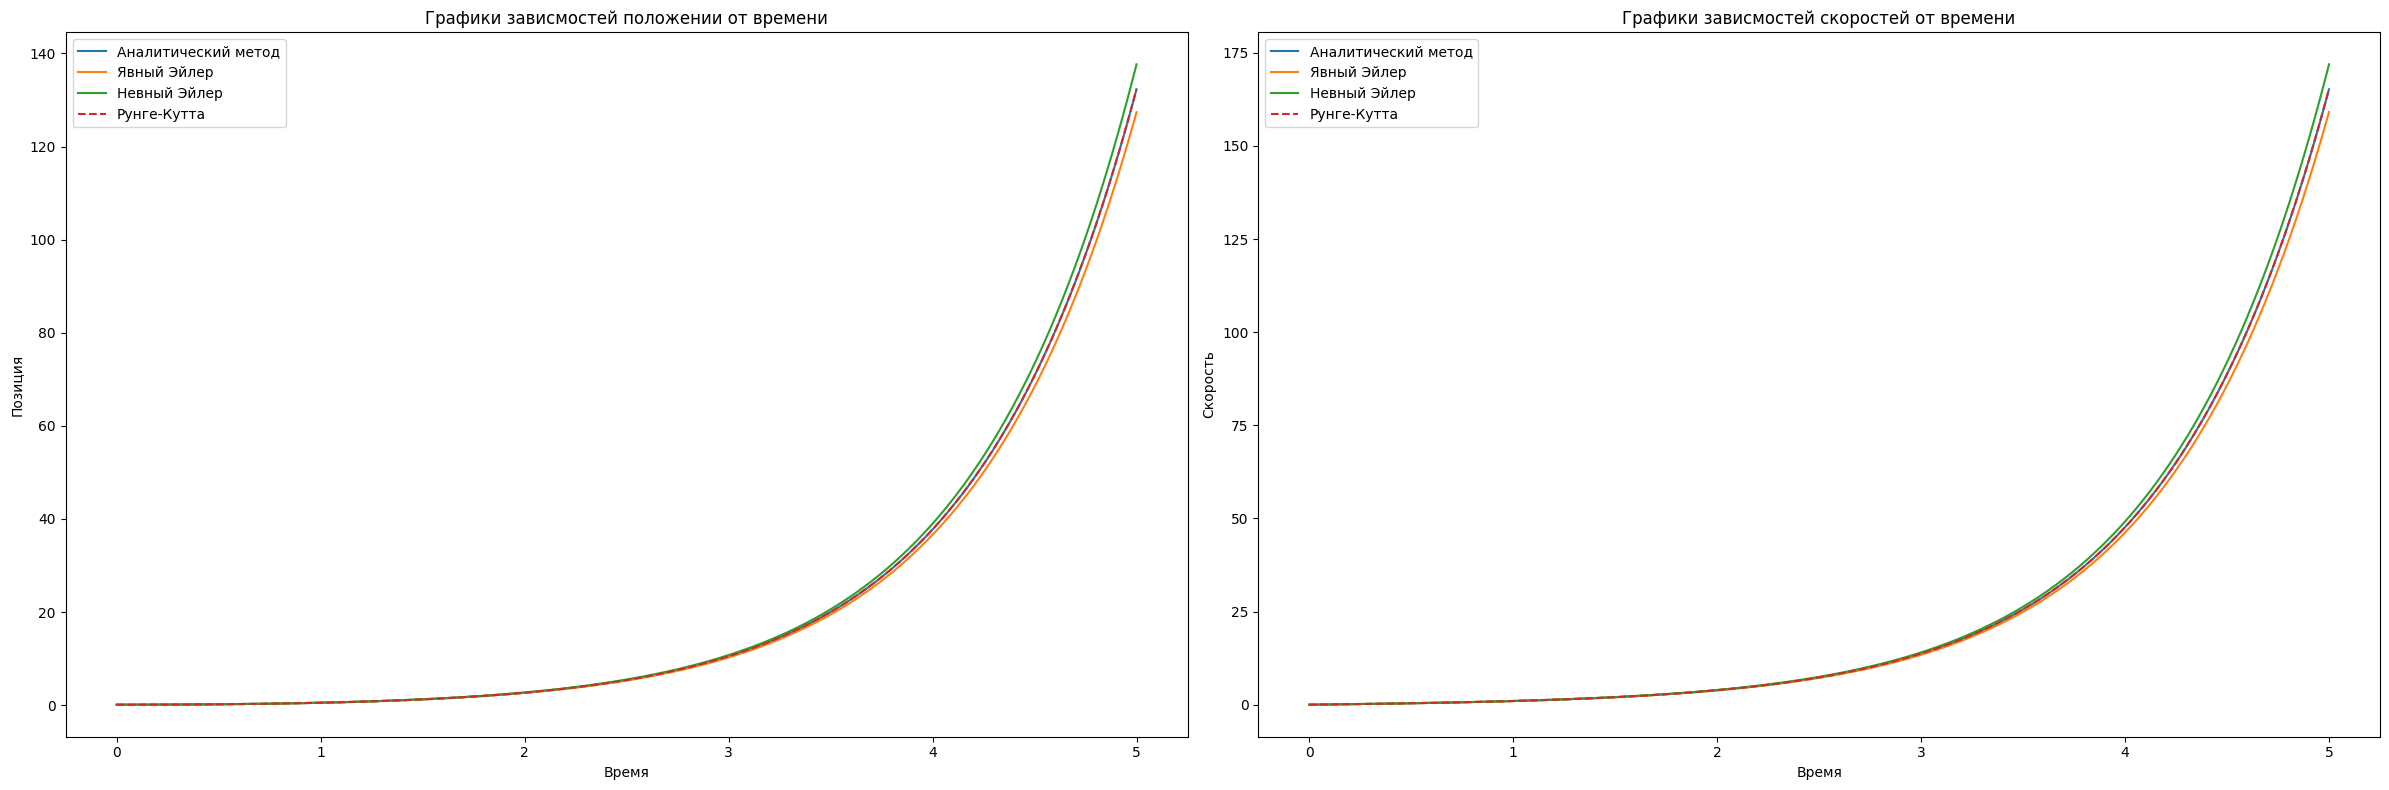

In [423]:
plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.plot(t_an, x_an[0, :], label='Аналитический метод')
plt.plot(t_fe, x_fe[0, :], label='Явный Эйлер')
plt.plot(t_be, x_be[0, :], label='Невный Эйлер')
plt.plot(t_rk4, x_rk4[0, :], label='Рунге-Кутта', linestyle='--')
plt.xlabel('Время')
plt.ylabel('Позиция')
plt.legend()
plt.title('Графики зависмостей положении от времени')

plt.subplot(1, 2, 2)
plt.plot(t_an, x_an[1, :], label='Аналитический метод')
plt.plot(t_fe, x_fe[1, :], label='Явный Эйлер')
plt.plot(t_be, x_be[1, :], label='Невный Эйлер')
plt.plot(t_rk4, x_rk4[1, :], label='Рунге-Кутта', linestyle='--')
plt.xlabel('Время')
plt.ylabel('Скорость')
plt.legend()
plt.title('Графики зависмостей скоростей от времени')

plt.tight_layout()
plt.show()

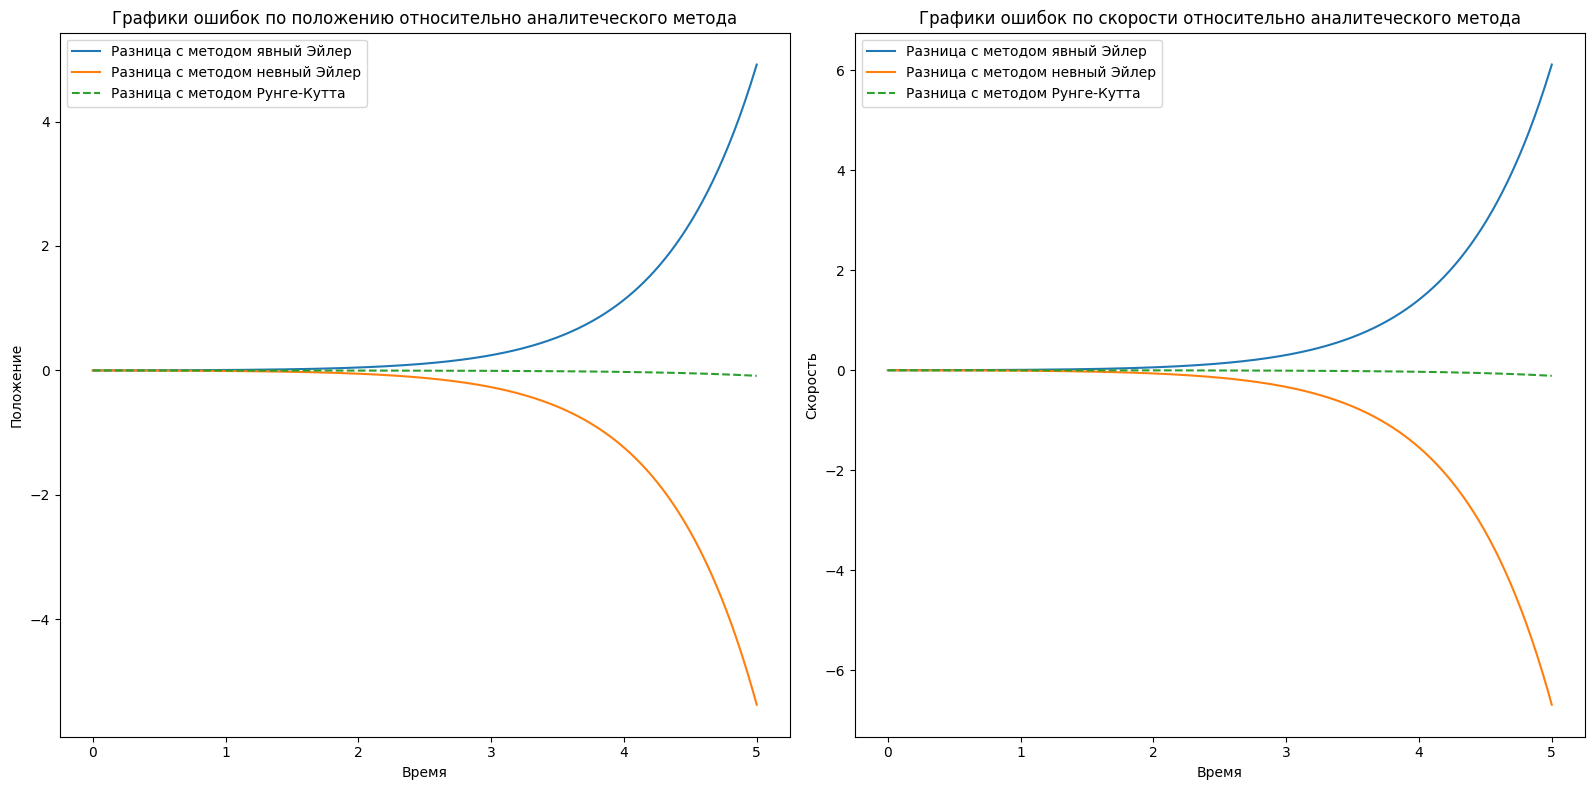

In [424]:
plt.figure(figsize=(24, 8))

plt.subplot(1, 3, 1)
plt.plot(t_an, x_an[0, :] - x_fe[0, :], label='Разница с методом явный Эйлер')
plt.plot(t_be, x_an[0, :] - x_be[0, :], label='Разница с методом невный Эйлер')
plt.plot(t_rk4, x_an[0, :] - x_rk4[0, :], label='Разница с методом Рунге-Кутта', linestyle='--')
plt.xlabel('Время')
plt.ylabel('Положение')
plt.legend()
plt.title('Графики ошибок по положению относительно аналитеческого метода')

plt.subplot(1, 3, 2)
plt.plot(t_an, x_an[1, :] - x_fe[1, :], label='Разница с методом явный Эйлер')
plt.plot(t_be, x_an[1, :] - x_be[1, :], label='Разница с методом невный Эйлер')
plt.plot(t_rk4, x_an[1, :] - x_rk4[1, :], label='Разница с методом Рунге-Кутта', linestyle='--')
plt.xlabel('Время')
plt.ylabel('Скорость')
plt.legend()
plt.title('Графики ошибок по скорости относительно аналитеческого метода')

plt.tight_layout()
plt.show()

In [425]:
print(f"СКО по положению (явный Эйлер): {np.mean(np.square(x_an[0, :] - x_fe[0, :]))}")
print(f"СКО по положению (неявный Эйлер): {np.mean(np.square(x_an[0, :] - x_be[0, :]))}")
print(f"СКО по положению (Рунге-Кутта): {np.mean(np.square(x_an[0, :] - x_rk4[0, :]))}")

СКО по положению (явный Эйлер): 1.6778012883206044
СКО по положению (неявный Эйлер): 2.0014896618019558
СКО по положению (Рунге-Кутта): 0.000581025811910222


In [426]:
print(f"СКО по скорости (явный Эйлер): {np.mean(np.square(x_an[1, :] - x_fe[1, :]))}")
print(f"СКО по скорости (неявный Эйлер): {np.mean(np.square(x_an[1, :] - x_be[1, :]))}")
print(f"СКО по скорости (Рунге-Кутта): {np.mean(np.square(x_an[1, :] - x_rk4[1, :]))}")

СКО по скорости (явный Эйлер): 2.5900223306376904
СКО по скорости (неявный Эйлер): 3.098354652342568
СКО по скорости (Рунге-Кутта): 0.0009699581480504017
